# Likelihood-free posterior sampling

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from cag.inference import LikelihoodFreeMetropolisHastings as MCMC

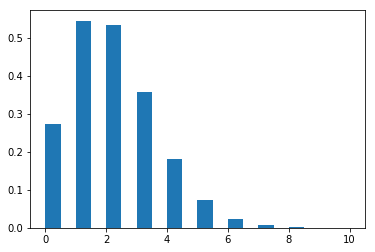

In [2]:
from cag.benchmark.poisson import allocate_observations

# SAmple the (true) observations.
theta_true, x_o = allocate_observations(2.)
hist, bins = np.histogram(x_o.numpy(), bins=20, density=True)
width = 1. * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, width=width, align="center")
plt.show()

In [3]:
hidden_layers = 6
hidden_units = 100

modules = []
modules.append(torch.nn.Linear(1, hidden_units))
modules.append(torch.nn.PReLU())
for layer_index in range(hidden_layers):
    modules.append(torch.nn.Linear(hidden_units, hidden_units))
    modules.append(torch.nn.PReLU())
modules.append(torch.nn.Linear(hidden_units, 1))
modules.append(torch.nn.Sigmoid())

classifier = torch.nn.Sequential(*modules)

In [ ]:
from cag.benchmark.poisson import PoissonSimulator as Simulator
from cag.transition import NormalTransitionDistribution
from cag.transition import UniformTransitionDistribution

simulator = Simulator()
#transition = NormalTransitionDistribution()
transition = UniformTransitionDistribution(0, 5)
mcmc = MCMC(simulator, transition, classifier)

In [ ]:
initializer = torch.distributions.uniform.Uniform(0, 5)

num_samples = 100
samples = mcmc.infer(x_o, initializer, num_samples)

In [ ]:
plt.hist(samples.squeeze().numpy(), bins=20)
plt.show()